# Cisco - Ariel University API Security Detection Challenge 2023


---



---



## Dataset 4 (Task 4) - Label phase

The most advance and complex dataset containing all the above, and some more advanced features like API redirection, more requests types, deeper data access and more.

```
Dataset 4 score - Label phase:

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     25292
           1    1.00000   1.00000   1.00000      6967

    accuracy                        1.00000     32259
   macro avg    1.00000   1.00000   1.00000     32259
weighted avg    1.00000   1.00000   1.00000     32259
```



[Link to the Dataset 4](https://drive.google.com/file/d/15MxHRAdwPXCENACwn8wLMkb98ZCjDeh6/view?usp=share_link)

## Baseline code

### Imports and global settings

In [19]:
# Imports, settings and first dataset view
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import numpy as np
import json

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.decomposition import TruncatedSVD

import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as ps
import matplotlib.pyplot as plt
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.templates['plotly_dark'].layout.autosize = False
pio.templates['plotly_dark'].layout.width = 1_000
pio.templates['plotly_dark'].layout.height = 800

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer, recall_score

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import StackingClassifier

from urllib.parse import urlparse

import pickle

# from ipywidgets import widgets

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

# Global setting here you choose the dataset number and classification type for the model
dataset_number = 4  # Options are [1, 2, 3, 4]
test_type = 'label'  # Options are ['label', 'attack_type']

# Read the json and read it to a pandas dataframe object, you can change these settings
with open(f'./dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
df = pd.json_normalize(raw_ds, max_level=2)

# Shoe the first five lines of the dataframe to see if everything was read accordingly
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,request.Attack_Tag,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests
0,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,de-CH,none,same-origin,no-store,?1,document,['ttauth=AnmLHb1kdzYvpficmoZ6ahuxln7RK43GPlS6Q...,"Sun, 18 Dec 2022 01:42:25 GMT",GET,http://127.0.0.1:5000/orders/get/random/2,,200 OK,application/json,8,200,"[{}, {}]",NaN,NaN,NaN,NaN,NaN,NaN
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['cid=9ML55TwNFFw14MA2N-N6B8v_LTjMEyppvz3F-H99...,"Sun, 18 Dec 2022 01:44:11 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,NaN,NaN
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br${jndi:ldaphabbologinbr.rel7....",*/*,keep-alive,NaN,?1,"en-US,en;q=0.9,he;q=0.8",none,same-origin,no-store,?1,document,['ttauth=XSgpzlTZBc47Xm36ObpZplFzV2KbUgC68xBcA...,"Sun, 18 Dec 2022 01:34:30 GMT",GET,http://127.0.0.1:5000/login/user?username=Rich...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",LOG4J,NaN,NaN,NaN,NaN,NaN
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; ...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,"""Windows""",?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['ttauth=kOqLuuI_RaiyuKw-926q36BZ4s3ZH251NQ37i...,"Sun, 18 Dec 2022 01:43:59 GMT",GET,http://127.0.0.1:5000/greet/Warren,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,NaN,NaN
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?1,de-CH,none,websocket,max-age=0,?1,document,['ttauth=rN-ka7ksV-2K6QtY-_wNmdI1i4zY2kVoDQW6e...,"Sun, 18 Dec 2022 01:23:50 GMT",GET,http://127.0.0.1:5000/states/Bagdon?resource=R...,,404 NOT FOUND,application/json,28,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,NaN,NaN


### Basic dataset label arrangements

In [20]:
# Fill the black attack tag lines with "Benign" string
df['request.Attack_Tag'] = df['request.Attack_Tag'].fillna('Benign')
df['attack_type'] = df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns
# You can use this snippet to run your own lambda on any data with the apply() method

def categorize(row):
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'


df['label'] = df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
df.drop('request.Attack_Tag', axis=1, inplace=True)

df

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,de-CH,none,same-origin,no-store,?1,document,['ttauth=AnmLHb1kdzYvpficmoZ6ahuxln7RK43GPlS6Q...,"Sun, 18 Dec 2022 01:42:25 GMT",GET,http://127.0.0.1:5000/orders/get/random/2,,200 OK,application/json,8,200,"[{}, {}]",NaN,NaN,NaN,NaN,NaN,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['cid=9ML55TwNFFw14MA2N-N6B8v_LTjMEyppvz3F-H99...,"Sun, 18 Dec 2022 01:44:11 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",NaN,NaN,NaN,NaN,NaN,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br${jndi:ldaphabbologinbr.rel7....",*/*,keep-alive,NaN,?1,"en-US,en;q=0.9,he;q=0.8",none,same-origin,no-store,?1,document,['ttauth=XSgpzlTZBc47Xm36ObpZplFzV2KbUgC68xBcA...,"Sun, 18 Dec 2022 01:34:30 GMT",GET,http://127.0.0.1:5000/login/user?username=Rich...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",NaN,NaN,NaN,NaN,NaN,LOG4J,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; ...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,"""Windows""",?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['ttauth=kOqLuuI_RaiyuKw-926q36BZ4s3ZH251NQ37i...,"Sun, 18 Dec 2022 01:43:59 GMT",GET,http://127.0.0.1:5000/greet/Warren,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,NaN,NaN,NaN,NaN,NaN,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?1,de-CH,none,websocket,max-age=0,?1,document,['ttauth=rN-ka7ksV-2K6QtY-_wNmdI1i4zY2kVoDQW6e...,"Sun, 18 Dec 2022 01:23:50 GMT",GET,http://127.0.0.1:5000/states/Bagdon?resource=R...,,404 NOT FOUND,application/json,28,404,"{""error"": ""State not found""}",NaN,NaN,NaN,NaN,NaN,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182762,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,NaN,?0,"en-US,en;q=0.5",none,websocket,no-cache,?1,document,['ttauth=NPpRHbzfv7BJ5RGB9-oJNl30Ttdc8RYxbuiSe...,"Sun, 18 Dec 2022 01:25:40 GMT",GET,http://127.0.0.1:5000/login/user?username=Brue...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",NaN,NaN,NaN,NaN,NaN,SQL Injection,Malware
182763,127.0.0.1:5000,Mozilla/5.0 (X11; Linux x86_64; rv:28.0) Gecko...,"gzip, deflate, br",*/*,keep-alive,NaN,?0,de-CH,none,websocket,no-cache,?1,document,['ttauth=Mqfe3PeeakWRmzjsA7MKaNiXmVcbMxMuNQxej...,"Sun, 18 Dec 2022 01:19:48 GMT",GET,http://127.0.0.1:5000/cookielogin,,200 OK,text/html; charset=utf-8,104,200,text/html; charset=utf-8,NaN,username=gASVyAAAAAAAAACMCGJ1aWx0aW5zlIwEZXZhb...,NaN,NaN,NaN,Cookie Injection,Malware
182764,127.0.0.1:5000,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"gzip, deflate, br",*/*,keep-alive,NaN,?0,de-CH,none,same-origin,max-age=0,?1,document,['cid=-Sp8A62rcqJXADEypNzwtw-iIf9cdHkqMQvKT

In [21]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182767 entries, 0 to 182766
Data columns (total 30 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   request.headers.Host                       182767 non-null  object
 1   request.headers.User-Agent                 182767 non-null  object
 2   request.headers.Accept-Encoding            182767 non-null  object
 3   request.headers.Accept                     182767 non-null  object
 4   request.headers.Connection                 182767 non-null  object
 5   request.headers.Sec-Ch-Ua-Platform         124574 non-null  object
 6   request.headers.Sec-Ch-Ua-Mobile           161414 non-null  object
 7   request.headers.Accept-Language            161414 non-null  object
 8   request.headers.Sec-Fetch-Site             161414 non-null  object
 9   request.headers.Sec-Fetch-Mode             161414 non-null  object
 10  request.headers.Cach

In [22]:
# Check for correlated features
print(df.corr())

                      response.status_code
response.status_code                   1.0


C:\Users\kushn\AppData\Local\Temp\ipykernel_15828\1658926091.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [23]:
# Minimum number of unique values to print value counts for
min_unique_values = 10

# Check the distribution of categories within each categorical feature
for column in df.columns:
  if df[column].dtype == 'object' and df[column].nunique() >= min_unique_values:
    print(f'{column}:')
    print(df[column].value_counts())

request.headers.User-Agent:
python-requests/2.28.1                                                                                                       21353
Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:27.0) Gecko/20121011 Firefox/27.0                                                 5085
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0                                            5035
Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3                                                             5009
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.1                                                      4986
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20130401 Firefox/31.0                                                      4978
Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36                   4974
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML,

In [24]:
# List of columns to focus on
columns_to_focus_on = ['request.headers.User-Agent', 'request.headers.Sec-Fetch-Site']

# Check the distribution of categories within each categorical feature
for column in columns_to_focus_on:
  if df[column].dtype == 'object':
    print(f'{column}:')
    print(df[column].value_counts())

request.headers.User-Agent:
python-requests/2.28.1                                                                                                       21353
Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:27.0) Gecko/20121011 Firefox/27.0                                                 5085
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0                                            5035
Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3                                                             5009
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.1                                                      4986
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20130401 Firefox/31.0                                                      4978
Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36                   4974
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML,

In [25]:
# Check the distribution of categories within each categorical feature
for column in df.columns:
  if df[column].dtype == 'object':
    print(f'{column}:')
    print(df[column].value_counts())

request.headers.Host:
127.0.0.1:5000    182767
Name: request.headers.Host, dtype: int64
request.headers.User-Agent:
python-requests/2.28.1                                                                                                       21353
Mozilla/5.0 (Windows NT 6.2; Win64; x64; rv:27.0) Gecko/20121011 Firefox/27.0                                                 5085
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0                                            5035
Mozilla/5.0 (Windows NT 6.1; rv:27.3) Gecko/20130101 Firefox/27.3                                                             5009
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.1                                                      4986
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20130401 Firefox/31.0                                                      4978
Mozilla/5.0 (Windows NT 4.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safa

In [26]:
# Check the balance of the target classes
print(df['label'].value_counts())

Benign     143297
Malware     39470
Name: label, dtype: int64


In [27]:
# Check the proportion of missing values in each feature
print(df.isnull().mean())

request.headers.Host                         0.000000
request.headers.User-Agent                   0.000000
request.headers.Accept-Encoding              0.000000
request.headers.Accept                       0.000000
request.headers.Connection                   0.000000
request.headers.Sec-Ch-Ua-Platform           0.318400
request.headers.Sec-Ch-Ua-Mobile             0.116832
request.headers.Accept-Language              0.116832
request.headers.Sec-Fetch-Site               0.116832
request.headers.Sec-Fetch-Mode               0.116832
request.headers.Cache-Control                0.116832
request.headers.Sec-Fetch-User               0.116832
request.headers.Sec-Fetch-Dest               0.116832
request.headers.Set-Cookie                   0.116832
request.headers.Date                         0.116832
request.method                               0.000000
request.url                                  0.000000
request.body                                 0.000000
response.status             

In [28]:
# Check the distribution of numerical features
print(df.describe())

       response.status_code
count         182767.000000
mean             273.205912
std               95.020687
min              200.000000
25%              200.000000
50%              200.000000
75%              401.000000
max              500.000000


In [29]:
# Check the number of unique values in each feature
print(df.nunique())

request.headers.Host                              1
request.headers.User-Agent                       34
request.headers.Accept-Encoding                 638
request.headers.Accept                            1
request.headers.Connection                        1
request.headers.Sec-Ch-Ua-Platform                1
request.headers.Sec-Ch-Ua-Mobile                  2
request.headers.Accept-Language                   4
request.headers.Sec-Fetch-Site                  654
request.headers.Sec-Fetch-Mode                    2
request.headers.Cache-Control                     3
request.headers.Sec-Fetch-User                    1
request.headers.Sec-Fetch-Dest                  681
request.headers.Set-Cookie                   154705
request.headers.Date                           2206
request.method                                    2
request.url                                   86937
request.body                                   9463
response.status                                   7
response.hea

In [30]:
# Check the data types of the features
print(df.dtypes)

request.headers.Host                         object
request.headers.User-Agent                   object
request.headers.Accept-Encoding              object
request.headers.Accept                       object
request.headers.Connection                   object
request.headers.Sec-Ch-Ua-Platform           object
request.headers.Sec-Ch-Ua-Mobile             object
request.headers.Accept-Language              object
request.headers.Sec-Fetch-Site               object
request.headers.Sec-Fetch-Mode               object
request.headers.Cache-Control                object
request.headers.Sec-Fetch-User               object
request.headers.Sec-Fetch-Dest               object
request.headers.Set-Cookie                   object
request.headers.Date                         object
request.method                               object
request.url                                  object
request.body                                 object
response.status                              object
response.hea

### Preprocessing Data


In [ ]:
list_of_nan_for_more_than_90 = []
for col in df.columns:
    if df[col].isna().sum() / df.shape[0] * 100 > 90:
        list_of_nan_for_more_than_90.append(col)
        print(f"Column {col} has {df[col].isna().sum()} NaN values, which is {round(df[col].isna().sum() / df.shape[0] * 100, 2)}%, and has {df[col].nunique()} unique values")

In [32]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df.columns[df.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df[column] = df[column].fillna('None')

# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Accept,request.headers.Connection,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-User,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.headers.Date,request.method,request.url,request.body,response.status,response.headers.Content-Type,response.headers.Content-Length,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label
0,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,de-CH,none,same-origin,no-store,?1,document,['ttauth=AnmLHb1kdzYvpficmoZ6ahuxln7RK43GPlS6Q...,"Sun, 18 Dec 2022 01:42:25 GMT",GET,http://127.0.0.1:5000/orders/get/random/2,,200 OK,application/json,8,200,"[{}, {}]",None,None,None,None,None,Benign,Benign
1,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?0,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['cid=9ML55TwNFFw14MA2N-N6B8v_LTjMEyppvz3F-H99...,"Sun, 18 Dec 2022 01:44:11 GMT",GET,http://127.0.0.1:5000/orders/check/exists?val=...,,404 NOT FOUND,application/json,31,404,"{""error"": ""Order ID not found""}",None,None,None,None,None,Benign,Benign
2,127.0.0.1:5000,Mozilla/5.0 (Windows NT 5.1; rv:31.0) Gecko/20...,"gzip, deflate, br${jndi:ldaphabbologinbr.rel7....",*/*,keep-alive,None,?1,"en-US,en;q=0.9,he;q=0.8",none,same-origin,no-store,?1,document,['ttauth=XSgpzlTZBc47Xm36ObpZplFzV2KbUgC68xBcA...,"Sun, 18 Dec 2022 01:34:30 GMT",GET,http://127.0.0.1:5000/login/user?username=Rich...,,401 UNAUTHORIZED,application/json,26,401,"{""error"": ""Access denied""}",None,None,None,None,None,LOG4J,Malware
3,127.0.0.1:5000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; ...,"x-gzip, x-deflate, gzip, deflate",*/*,keep-alive,"""Windows""",?1,"en-US,en;q=0.9,he;q=0.8",none,websocket,no-cache,?1,document,['ttauth=kOqLuuI_RaiyuKw-926q36BZ4s3ZH251NQ37i...,"Sun, 18 Dec 2022 01:43:59 GMT",GET,http://127.0.0.1:5000/greet/Warren,,200 OK,text/html; charset=utf-8,22,200,text/html; charset=utf-8,None,None,None,None,None,Benign,Benign
4,127.0.0.1:5000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,"gzip, deflate, br",*/*,keep-alive,"""Windows""",?1,de-CH,none,websocket,max-age=0,?1,document,['ttauth=rN-ka7ksV-2K6QtY-_wNmdI1i4zY2kVoDQW6e...,"Sun, 18 Dec 2022 01:23:50 GMT",GET,http://127.0.0.1:5000/states/Bagdon?resource=R...,,404 NOT FOUND,application/json,28,404,"{""error"": ""State not found""}",None,None,None,None,None,Benign,Benign


In [33]:
# Detect columns that have the same value for all rows and print them
from collections import Counter
for column in df.columns:
    if len(Counter(df[column])) == 1:
        print(column)

request.headers.Host
request.headers.Accept
request.headers.Connection


In [34]:
# # Check which features affect what using correlation heatmap
#
# # Create a correlation matrix
# corr_matrix = df.corr().abs()
#
# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#
# # Find index of feature columns with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
#
# print(f"Columns to drop: {to_drop}")

Columns to drop: []


C:\Users\kushn\AppData\Local\Temp\ipykernel_15828\1757241736.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
C:\Users\kushn\AppData\Local\Temp\ipykernel_15828\1757241736.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [35]:
# Create new features from URL
# Search for '$' in the headers

def create_features(df):
    df['url_path'] = df.apply(lambda x: urlparse(x["request.url"]).path, axis=1)
    df['url_query'] = df.apply(lambda x: urlparse(x["request.url"]).query, axis=1)
    df['url_netloc'] = df.apply(lambda x: urlparse(x["request.url"]).netloc, axis=1)
    df['url_scheme'] = df.apply(lambda x: urlparse(x["request.url"]).scheme, axis=1)
    df['url_length'] = df.apply(lambda x: len(x["request.url"]), axis=1)
    df['url_path_length'] = df.apply(lambda x: len(x["url_path"]), axis=1)
    df['url_query_length'] = df.apply(lambda x: len(x["url_query"]), axis=1)
    df['url_netloc_length'] = df.apply(lambda x: len(x["url_netloc"]), axis=1)

    # If the URL contains a double dot, it is probably a malicious URL because it is a directory traversal attack.
    df['url_contains_..'] = df.apply(lambda x: True if '..' in x["request.url"] else False, axis=1)

    # If the URL contains ... it is probably a malicious URL because it is a directory traversal attack.
    df['url_contains_...'] = df.apply(lambda x: True if '...' in x["request.url"] else False, axis=1)

    # If an absolute file path is provided in the input parameters, it may be an indication that the attacker is attempting to access files outside of the intended directory structure.
    df['url_contains_://'] = df.apply(lambda x: True if '://' in x["request.url"] else False, axis=1)

    # Null characters can be used to bypass input validation and may be an indicator of an attempt to traverse the directory tree.
    df['url_contains_%00'] = df.apply(lambda x: True if '%00' in x["url_query"] else False, axis=1)

    # If the URL contains carriage return character, it is probably a malicious URL because it is a command injection attack.
    df['url_contains_%0D'] = df.apply(lambda x: True if '%0D' in x["url_query"] else False, axis=1)

    # If the URL contains a line feed character, it is probably a malicious URL because it is a command injection attack.
    df['url_contains_%0A'] = df.apply(lambda x: True if '%0A' in x["url_query"] else False, axis=1)

    # To detect LOG4J attacks, check for the presence of the log4j string in the data.
    df['url_contains_log4j'] = df.apply(lambda x: True if 'log4j' in x["url_query"] else False, axis=1)

    # If the URL contains a dollar sign, it is probably a malicious URL because it is a command injection attack.
    df['url_contains_$'] = df.apply(lambda x: True if '$' in x["request.url"] else False, axis=1)

    # If the URL contains a backslash, it is probably a malicious URL because it is a command injection attack.
    df['url_contains_\\'] = df.apply(lambda x: True if '\\' in x["request.url"] else False, axis=1)

    # If the URL contains SQL keywords, it is probably a malicious URL because it is a SQL injection attack.
    SQL_keywords = ['SELECT', 'FROM', 'WHERE', 'DROP', 'INSERT', 'UPDATE', 'DELETE', 'CREATE', 'ALTER', 'TABLE', 'DATABASE', 'UNION', 'JOIN', 'ORDER BY', 'GROUP BY', 'HAVING', 'LIMIT', 'OFFSET', 'AND', 'OR', 'NOT', 'IN', 'LIKE', 'BETWEEN', 'IS NULL', 'IS NOT NULL', 'EXISTS', 'CASE', 'WHEN', 'THEN', 'ELSE', 'END', 'AS', 'ASC', 'DESC', 'ALL', 'ANY', 'SOME', 'DISTINCT', 'INTO', 'VALUES', 'TRUNCATE', 'REPLACE', 'RENAME', 'ROLLBACK', 'COMMIT', 'SAVEPOINT', 'GRANT', 'REVOKE', 'LOCK', 'UNLOCK', 'VIEW', 'INDEX', 'PRIMARY KEY', 'FOREIGN KEY', 'UNIQUE', 'CHECK', 'DEFAULT', 'REFERENCES', 'CONSTRAINT', 'TRIGGER', 'PROCEDURE', 'FUNCTION', 'BEGIN', 'DECLARE', 'CURSOR', 'FETCH', 'CLOSE', 'EXECUTE', 'HANDLER', 'LOAD', 'DATA', 'INFILE', 'INTO', 'OUTFILE', 'FIELDS', 'TERMINATED', 'LINES', 'STARTING', 'WITH', 'SET', 'SHOW', 'DESCRIBE', 'EXPLAIN', 'HELP', 'USE', 'DATABASES', 'TABLES', 'COLUMNS', 'STATUS', 'PROCESSLIST', 'KILL', 'ANALYZE', 'CHECKSUM', 'OPTIMIZE', 'REPAIR', 'REPLACE', 'BACKUP', 'RESTORE', 'EVENTS', 'LOGS', 'MASTER', 'SLAVE', 'BINLOG', 'PURGE', 'RESET', 'CHANGE', 'STOP', 'START', 'ALL', 'PRIVILEGES', 'WITH', 'GRANT OPTION', 'RELOAD', 'SHUTDOWN', 'PROCESS', 'FILE', 'SHOW DATABASES', 'REPLICATION SLAVE', 'REPLICATION CLIENT', 'CREATE TEMPORARY TABLES', 'LOCK TABLES', 'EXECUTE', 'REPLICATION SLAVE', 'REPLICATION CLIENT', 'CREATE VIEW', 'SHOW VIEW', 'CREATE ROUTINE', 'ALTER ROUTINE', 'CREATE USER', 'EVENT', 'TRIGGER', 'CREATE TABLESPACE', 'CREATE']
    df['url_contains_SQL_keywords'] = df.apply(lambda x: True if any(keyword in x["url_query"] for keyword in SQL_keywords) else False, axis=1)

    # If the URL contains a backtick, it is probably a malicious URL because it is a command injection attack.
    df['url_contains_`'] = df.apply(lambda x: True if '`' in x["request.url"] else False, axis=1)

    # If the URL contains a semicolon, it is probably a malicious URL because it is a command injection attack.
    df['url_contains_;'] = df.apply(lambda x: True if ';' in x["request.url"] else False, axis=1)

    # If the URL contains a percent sign, it is probably a malicious URL because it is a command injection attack.
    df['url_contains_%'] = df.apply(lambda x: True if '%' in x["request.url"] else False, axis=1)

    # If the URL contains a pipe, it is probably a malicious URL because it is a command injection attack.
    df['url_contains_|'] = df.apply(lambda x: True if '|' in x["request.url"] else False, axis=1)

    # Check if headers contains ${jndi that are often used in RCE attacks.
    df['contains_${jndi'] = df.apply(lambda x: True if '${jndi' in x["request.headers.Sec-Fetch-Site"] or '${jndi' in x["request.headers.Sec-Fetch-Mode"] or '${jndi' in x["request.headers.Sec-Fetch-User"] or '${jndi' in x["request.headers.Sec-Fetch-Dest"] or '${jndi' in x["request.headers.Set-Cookie"] or '${jndi' in x["request.headers.Accept-Encoding"] or '${jndi' in x["request.headers.Accept-Language"] or '${jndi' in x["request.headers.User-Agent"] else False, axis=1)

    # Check if some headers contain command injection keywords that are often used in RCE attacks.
    CI_keywords = ['|', '&', ';']
    df['contains_CI_keywords'] = df.apply(lambda x: True if any(keyword in x["request.headers.Sec-Fetch-Site"] for keyword in CI_keywords) or any(keyword in x["request.headers.Sec-Fetch-Mode"] for keyword in CI_keywords) or any(keyword in x["request.headers.Sec-Fetch-User"] for keyword in CI_keywords) or any(keyword in x["request.headers.Sec-Fetch-Dest"] for keyword in CI_keywords) or any(keyword in x["request.headers.Set-Cookie"] for keyword in CI_keywords) or any(keyword in x["request.headers.Accept-Encoding"] for keyword in CI_keywords) or any(keyword in x["request.headers.Accept-Language"] for keyword in CI_keywords) or any(keyword in x["request.headers.User-Agent"] for keyword in CI_keywords) else False, axis=1)

    # Check for headers which contain file extensions that are often used in RCE attacks.
    RCE_extensions = ['.jsp', '.php']
    df['contains_RCE_extensions'] = df.apply(lambda x: True if any(extension in x["request.headers.Sec-Fetch-Site"] for extension in RCE_extensions) or any(extension in x["request.headers.Sec-Fetch-Mode"] for extension in RCE_extensions) or any(extension in x["request.headers.Sec-Fetch-User"] for extension in RCE_extensions) or any(extension in x["request.headers.Sec-Fetch-Dest"] for extension in RCE_extensions) or any(extension in x["request.headers.Set-Cookie"] for extension in RCE_extensions) or any(extension in x["request.headers.Accept-Encoding"] for extension in RCE_extensions) or any(extension in x["request.headers.Accept-Language"] for extension in RCE_extensions) or any(extension in x["request.headers.User-Agent"] for extension in RCE_extensions) else False, axis=1)

    # <script> is often used in XSS attacks.
    df['has_script_tag']= df.apply(lambda x: True if '<script>' in x["request.headers.Sec-Fetch-Site"] or '<script>' in x["request.headers.Sec-Fetch-Mode"] or '<script>' in x["request.headers.Sec-Fetch-User"] or '<script>' in x["request.headers.Sec-Fetch-Dest"] or '<script>' in x["request.headers.Set-Cookie"] or '<script>' in x["request.headers.Accept-Encoding"] or '<script>' in x["request.headers.Accept-Language"] or '<script>' in x["request.headers.User-Agent"] else False, axis=1)

    # javascript keyword is often used in XSS attacks.
    df['has_javascript_keyword']= df.apply(lambda x: True if 'javascript' in x["request.headers.Sec-Fetch-Site"] or 'javascript' in x["request.headers.Sec-Fetch-Mode"] or 'javascript' in x["request.headers.Sec-Fetch-User"] or 'javascript' in x["request.headers.Sec-Fetch-Dest"] or 'javascript' in x["request.headers.Set-Cookie"] or 'javascript' in x["request.headers.Accept-Encoding"] or 'javascript' in x["request.headers.Accept-Language"] or 'javascript' in x["request.headers.User-Agent"] else False, axis=1)

    # <svg onload=alert(1)> and <svg onload=confirm(1)> are often used in XSS attacks.
    df['<svg onload=alert(1)>'] = df.apply(lambda x: True if '<svg onload=alert(1)>' in x["request.headers.Sec-Fetch-Site"] or '<svg onload=alert(1)>' in x["request.headers.Sec-Fetch-Mode"] or '<svg onload=alert(1)>' in x["request.headers.Sec-Fetch-User"] or '<svg onload=alert(1)>' in x["request.headers.Sec-Fetch-Dest"] or '<svg onload=alert(1)>' in x["request.headers.Set-Cookie"] or '<svg onload=alert(1)>' in x["request.headers.Accept-Encoding"] or '<svg onload=alert(1)>' in x["request.headers.Accept-Language"] or '<svg onload=alert(1)>' in x["request.headers.User-Agent"] else False, axis=1)
    df['<img src=x onerror=alert(1)>'] = df.apply(lambda x: True if '<img src=x onerror=alert(1)>' in x["request.headers.Sec-Fetch-Site"] or '<img src=x onerror=alert(1)>' in x["request.headers.Sec-Fetch-Mode"] or '<img src=x onerror=alert(1)>' in x["request.headers.Sec-Fetch-User"] or '<img src=x onerror=alert(1)>' in x["request.headers.Sec-Fetch-Dest"] or '<img src=x onerror=alert(1)>' in x["request.headers.Set-Cookie"] or '<img src=x onerror=alert(1)>' in x["request.headers.Accept-Encoding"] or '<img src=x onerror=alert(1)>' in x["request.headers.Accept-Language"] or '<img src=x onerror=alert(1)>' in x["request.headers.User-Agent"] else False, axis=1)
    df['contains_dollar'] = df.apply(lambda x: True if ('$' in x["request.headers.Sec-Fetch-Site"] or '$' in x["request.headers.Sec-Fetch-Mode"] or '$' in x["request.headers.Sec-Fetch-User"] or '$' in x["request.headers.Sec-Fetch-Dest"] or '$' in x["request.headers.Set-Cookie"] or '$' in x["request.headers.Accept-Encoding"] or '$' in x["request.headers.Accept-Language"] or '$' in x["request.headers.User-Agent"]) else False, axis=1)

create_features(df)

In [36]:
# Setting features for further feature extraction by choosing columns
# Some will be "simply" encoded via label encoding and others with HashingVectorizer

# # On these headers we will run a "simple" BOW
# SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
#                   'request.headers.Host',
#                   'request.method',
#                   'request.headers.Accept-Language',
#                   'request.headers.Sec-Fetch-Site',
#                   'request.headers.Sec-Fetch-Mode',
#                   'request.headers.Sec-Fetch-Dest',
#                   'response.status',
#                   ]

# # On these headers we will run HashingVectorizer
# COMPLEX_HEADERS = ['request.headers.User-Agent',
#                    'request.headers.Set-Cookie',
#                    'request.headers.Date',
#                    'request.url',
#                    'response.headers.Content-Type',
#                    'response.body',
#                    'response.headers.Location',
#                    'request.headers.Content-Length',
#                    'request.headers.Cookie',
#                    'response.headers.Set-Cookie'
#                    ]

COLUMNS_TO_REMOVE = ['request.body',
                     'response.headers.Content-Length',
                     'request.headers.Date',
                     'request.headers.Accept',
                     'request.headers.Connection',
                     'request.headers.Sec-Fetch-User',
                     ]

# This is our main preprocessing function that will iterate over all of the chosen
# columns and run some feature extraction models

def vectorize_df(df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)
    
    # Run LabelEncoder on all of the columns
    for column in df.columns.tolist():
        df[column] = le.fit_transform(df[column])
    for column in COLUMNS_TO_REMOVE:
        df.drop(column, axis=1, inplace=True)
    return df

df = vectorize_df(df)
df.head()

,request.headers.Host,request.headers.User-Agent,request.headers.Accept-Encoding,request.headers.Sec-Ch-Ua-Platform,request.headers.Sec-Ch-Ua-Mobile,request.headers.Accept-Language,request.headers.Sec-Fetch-Site,request.headers.Sec-Fetch-Mode,request.headers.Cache-Control,request.headers.Sec-Fetch-Dest,request.headers.Set-Cookie,request.method,request.url,response.status,response.headers.Content-Type,response.status_code,response.body,response.headers.Location,request.headers.Cookie,request.headers.Content-Length,response.headers.Set-Cookie,request.headers.Upgrade-Insecure-Requests,attack_type,label,url_path,url_query,url_netloc,url_scheme,url_length,url_path_length,url_query_length,url_netloc_length,url_contains_..,url_contains_...,url_contains_://,url_contains_%00,url_contains_%0D,url_contains_%0A,url_contains_log4j,url_contains_$,url_contains_\,url_contains_SQL_keywords,url_contains_`,url_contains_;,url_contains_%,url_contains_|,contains_${jndi,contains_CI_keywords,contains_RCE_extensions,has_script_tag,has_javascript_keyword,<svg onload=alert(1)>,<img src=x onerror=alert(1)>,contains_dollar
0,0,2,1,0,0,2,1,1,3,1,112176,0,75190,0,0,0,258,2,0,29,0,1,0,0,14119,0,0,0,12,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,24,1,0,0,4,1,2,2,1,8413,0,63097,5,0,5,9586,2,0,29,0,1,0,0,9208,62691,0,0,21,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,11,181,1,1,4,1,1,3,1,130505,0,52341,4,0,4,2861,2,0,29,0,1,3,1,9207,50438,0,0,50,4,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
3,0,1,637,0,1,4,1,2,2,1,141830,0,37500,0,1,0,260,2,0,29,0,1,0,0,2381,0,0,0,5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,16,1,0,1,2,1,2,1,1,147511,0,75448,5,0,5,9588,2,0,29,0,1,0,0,14257,33563,0,0,68,7,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [37]:
# Memory check

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182767 entries, 0 to 182766
Data columns (total 54 columns):
 #   Column                                     Non-Null Count   Dtype
---  ------                                     --------------   -----
 0   request.headers.Host                       182767 non-null  int32
 1   request.headers.User-Agent                 182767 non-null  int32
 2   request.headers.Accept-Encoding            182767 non-null  int32
 3   request.headers.Sec-Ch-Ua-Platform         182767 non-null  int32
 4   request.headers.Sec-Ch-Ua-Mobile           182767 non-null  int32
 5   request.headers.Accept-Language            182767 non-null  int32
 6   request.headers.Sec-Fetch-Site             182767 non-null  int32
 7   request.headers.Sec-Fetch-Mode             182767 non-null  int32
 8   request.headers.Cache-Control              182767 non-null  int32
 9   request.headers.Sec-Fetch-Dest             182767 non-null  int32
 10  request.headers.Set-Cookie      

In [38]:
# Choose features

features_list = df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')
print(features_list)

# Recheck all datatype before training to see we don't have any objects in our features
# In this example our model must get features containing only numbers so we recheck to see if we missed anything during preprocessing
df.dtypes

['request.headers.Host', 'request.headers.User-Agent', 'request.headers.Accept-Encoding', 'request.headers.Sec-Ch-Ua-Platform', 'request.headers.Sec-Ch-Ua-Mobile', 'request.headers.Accept-Language', 'request.headers.Sec-Fetch-Site', 'request.headers.Sec-Fetch-Mode', 'request.headers.Cache-Control', 'request.headers.Sec-Fetch-Dest', 'request.headers.Set-Cookie', 'request.method', 'request.url', 'response.status', 'response.headers.Content-Type', 'response.status_code', 'response.body', 'response.headers.Location', 'request.headers.Cookie', 'request.headers.Content-Length', 'response.headers.Set-Cookie', 'request.headers.Upgrade-Insecure-Requests', 'url_path', 'url_query', 'url_netloc', 'url_scheme', 'url_length', 'url_path_length', 'url_query_length', 'url_netloc_length', 'url_contains_..', 'url_contains_...', 'url_contains_://', 'url_contains_%00', 'url_contains_%0D', 'url_contains_%0A', 'url_contains_log4j', 'url_contains_$', 'url_contains_\\', 'url_contains_SQL_keywords', 'url_contai

request.headers.Host                         int32
request.headers.User-Agent                   int32
request.headers.Accept-Encoding              int32
request.headers.Sec-Ch-Ua-Platform           int32
request.headers.Sec-Ch-Ua-Mobile             int32
request.headers.Accept-Language              int32
request.headers.Sec-Fetch-Site               int32
request.headers.Sec-Fetch-Mode               int32
request.headers.Cache-Control                int32
request.headers.Sec-Fetch-Dest               int32
request.headers.Set-Cookie                   int32
request.method                               int32
request.url                                  int32
response.status                              int32
response.headers.Content-Type                int32
response.status_code                         int64
response.body                                int32
response.headers.Location                    int32
request.headers.Cookie                       int32
request.headers.Content-Length 

In [42]:
ss = StandardScaler()

In [43]:
pca = PCA(n_components=2)

In [44]:
# x_after_pca_in_2D=pca.fit_transform(df[features_list].to_numpy())
x_after_pca_in_2D = pca.fit_transform(ss.fit_transform(df[features_list].to_numpy()))

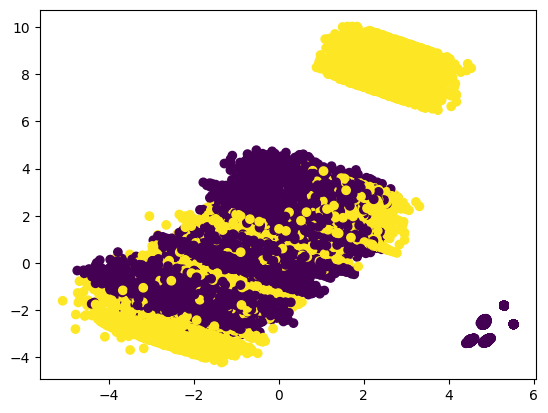

In [45]:
plt.scatter(x_after_pca_in_2D[:, 0], x_after_pca_in_2D[:, 1], c=df['label'].map({0: 0, 1: 1}))

In [46]:
pca = PCA()
pca.fit(ss.fit_transform(df[features_list].to_numpy()))

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    range_y=(0.98, 1.02),
    title="SVD Explained Variance Ratio"
)

As we can see we can compress the data into 36 components without losing any information.

## Train Test Split

*   x_Train and y_Train will be used for _Train_
*   x_test and y_test.T will be used for _Test_


In [47]:
# We convert the feature list to a numpy array, this is required for the model fitting
X = df[features_list]   #.to_numpy()

# This column is the desired prediction we will train our model on
y = np.stack(df[test_type])

# We split the dataset to train and test according to the required ration
# Do not change the test_size -> you can change anything else
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# We print the resulted datasets and count the difference
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(150508, 52) (150508,)
(32259, 52) (32259,)


Counter({0: 143297, 1: 39470})

In [48]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [49]:
pca = PCA(36)
pca.fit(X_train)
# x_train_pca = pca.transform(X_train)
x_train_pca_real = pca.transform(X_train)
x_train_pca = X_train

In [50]:
# x_test_pca = pca.transform(X_test)
x_test_pca_real = pca.transform(X_test)
x_test_pca = X_test

In [51]:
def plot_feature_importance(model):
    plt.figure(figsize=(10, 10))
    plt.title("Feature importance")
    plt.barh(range(x_train_pca.shape[1]), model.feature_importances_, align="center")
    plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
    plt.ylim([-1, x_train_pca.shape[1]])
    plt.show()

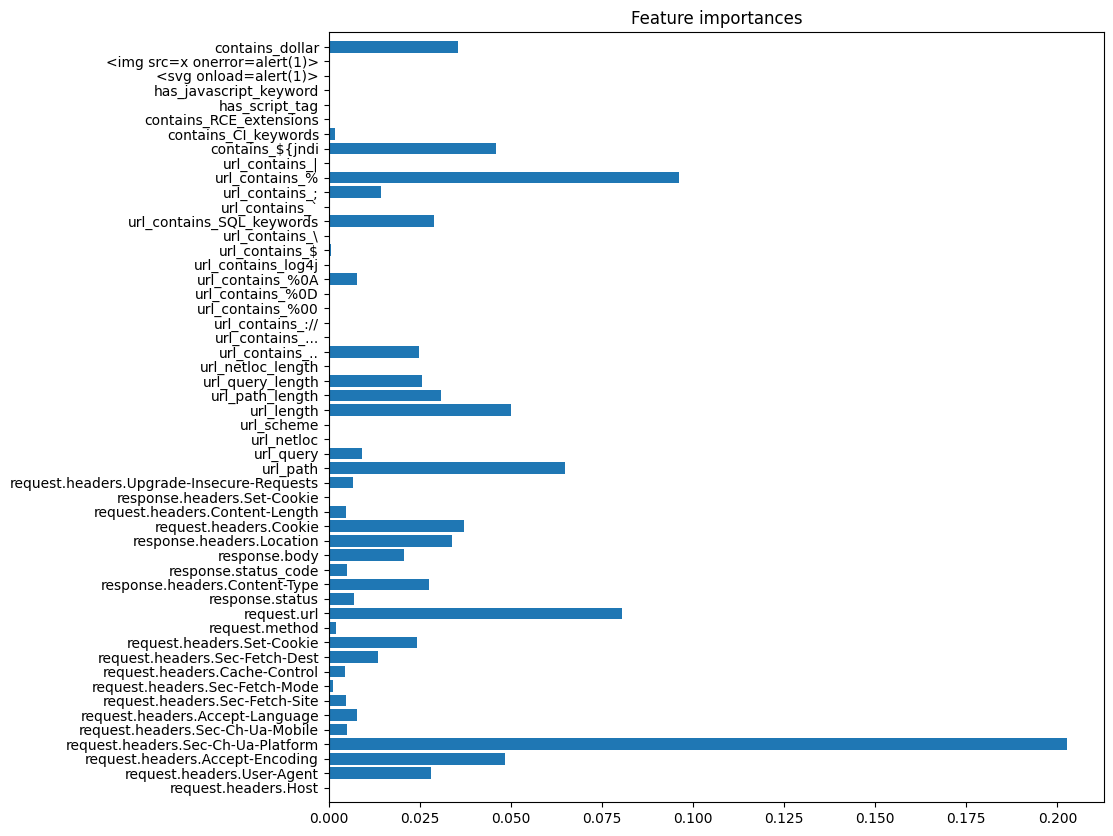

In [52]:
# Feature selection with Random Forest Classifier

rfc_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_fs.fit(x_train_pca, y_train)

# Plot the feature importance of the forest

plot_feature_importance(rfc_fs)

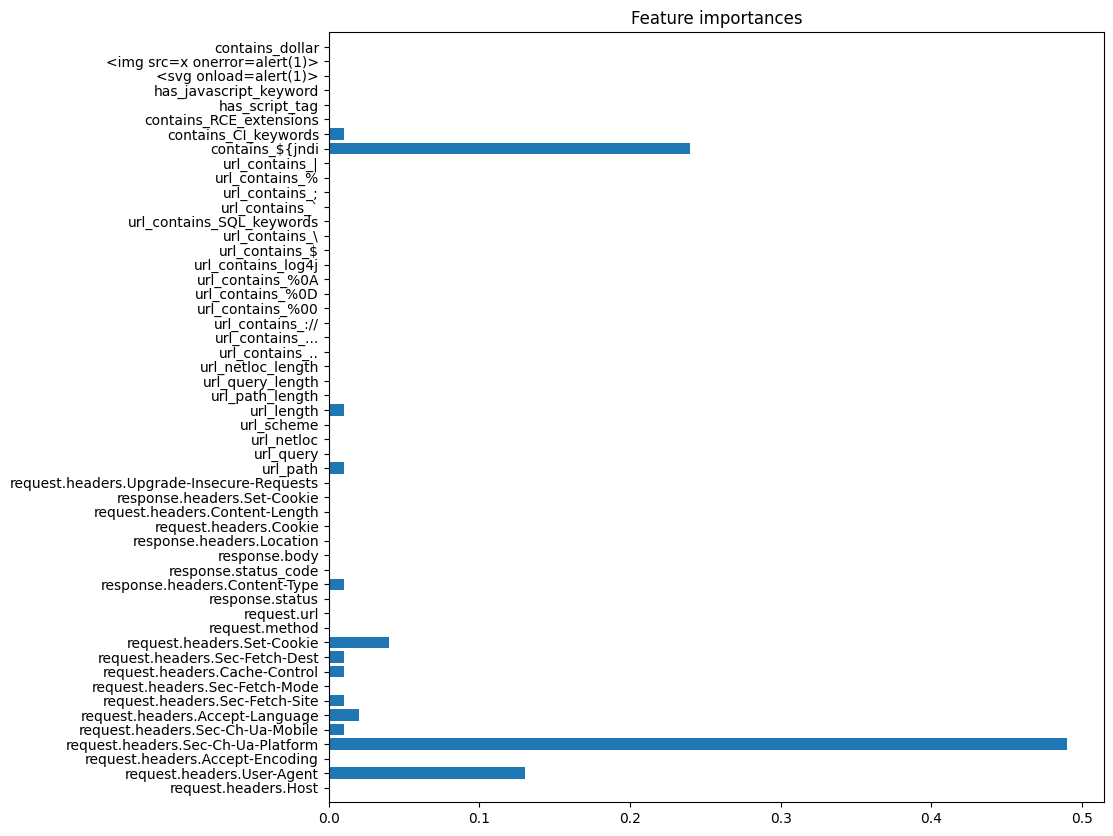

In [53]:
# Feature selection with AdaBoost Classifier

abc_fs = AdaBoostClassifier(n_estimators=100, random_state=42)
abc_fs.fit(x_train_pca, y_train)

# Plot the feature importance of the forest

plot_feature_importance(abc_fs)

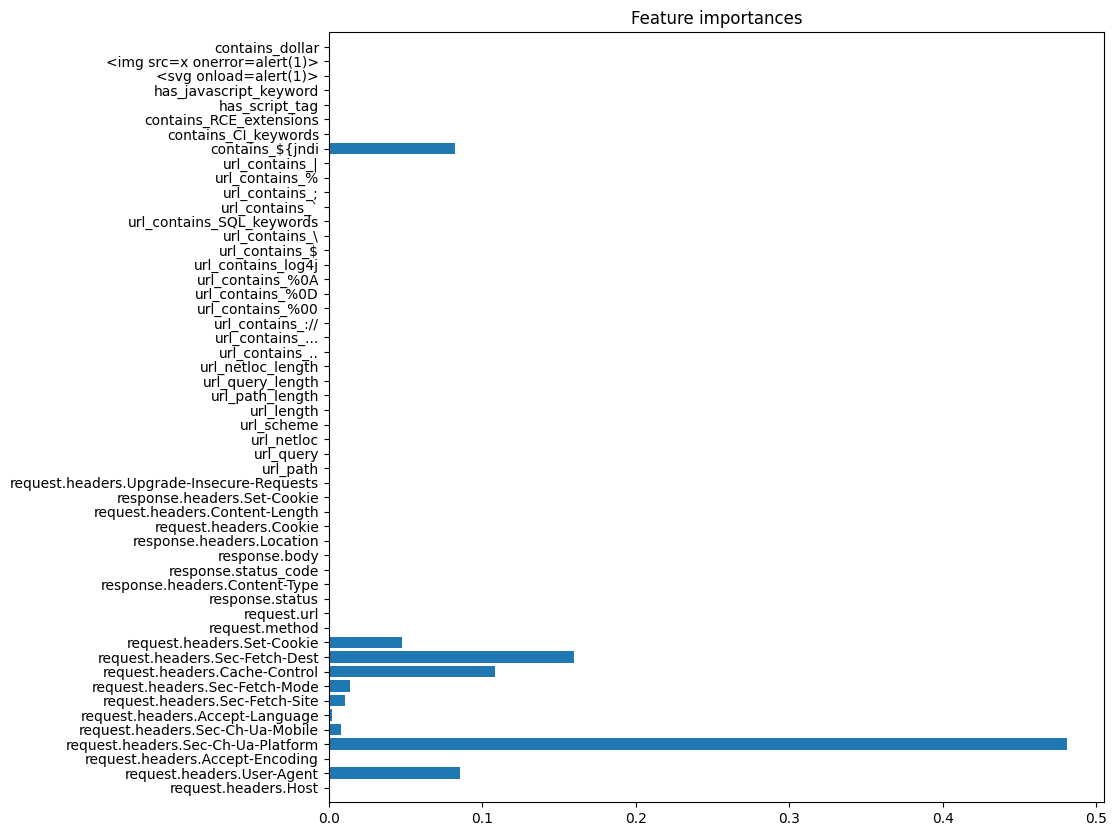

In [54]:
# Feature selection with Gradient Boosting Classifier

gbc_fs = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_fs.fit(x_train_pca, y_train)

# Plot the feature importance of the forest

plot_feature_importance(gbc_fs)

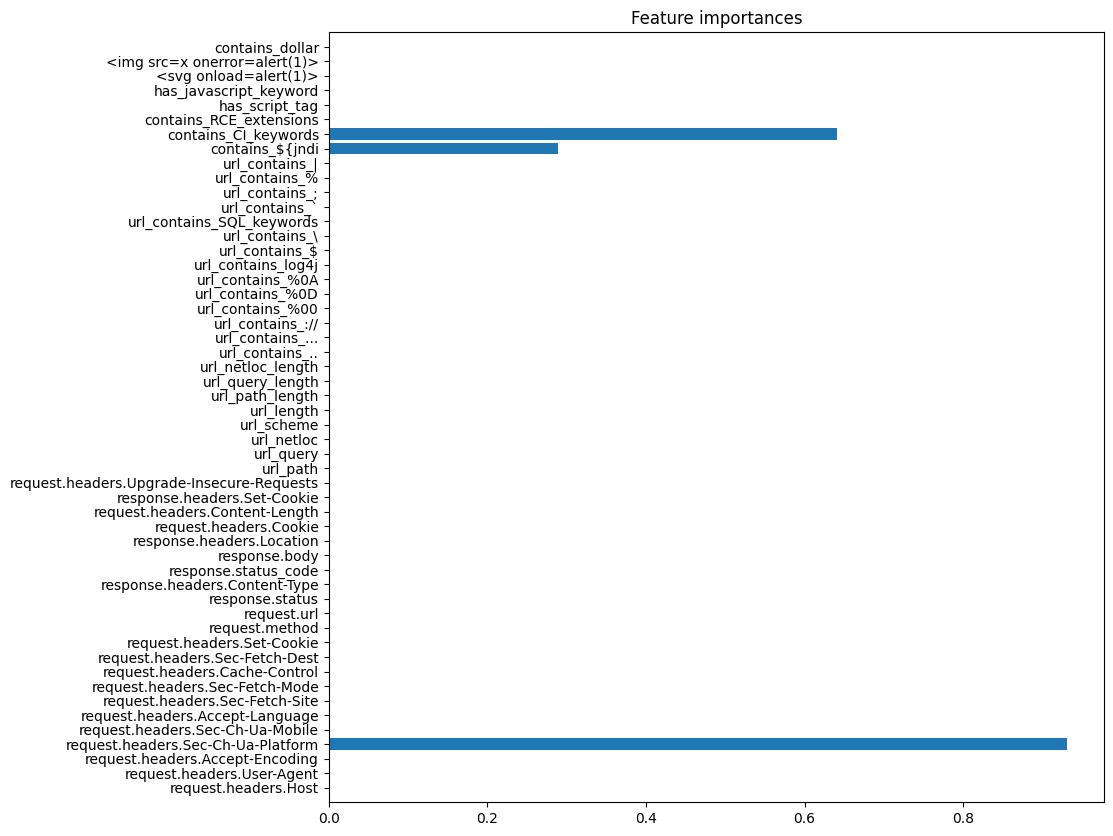

In [55]:
# Feature importance with Linear SVC
 
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x_train_pca, y_train)
lsvc.coef_

# Plot feature importance with Linear SVC

plt.figure(figsize=(10, 10))
plt.title("Feature importance")
plt.barh(range(x_train_pca.shape[1]), lsvc.coef_[0], align="center")
plt.yticks(np.arange(x_train_pca.shape[1]), features_list)
plt.ylim([-1, x_train_pca.shape[1]])
plt.show()

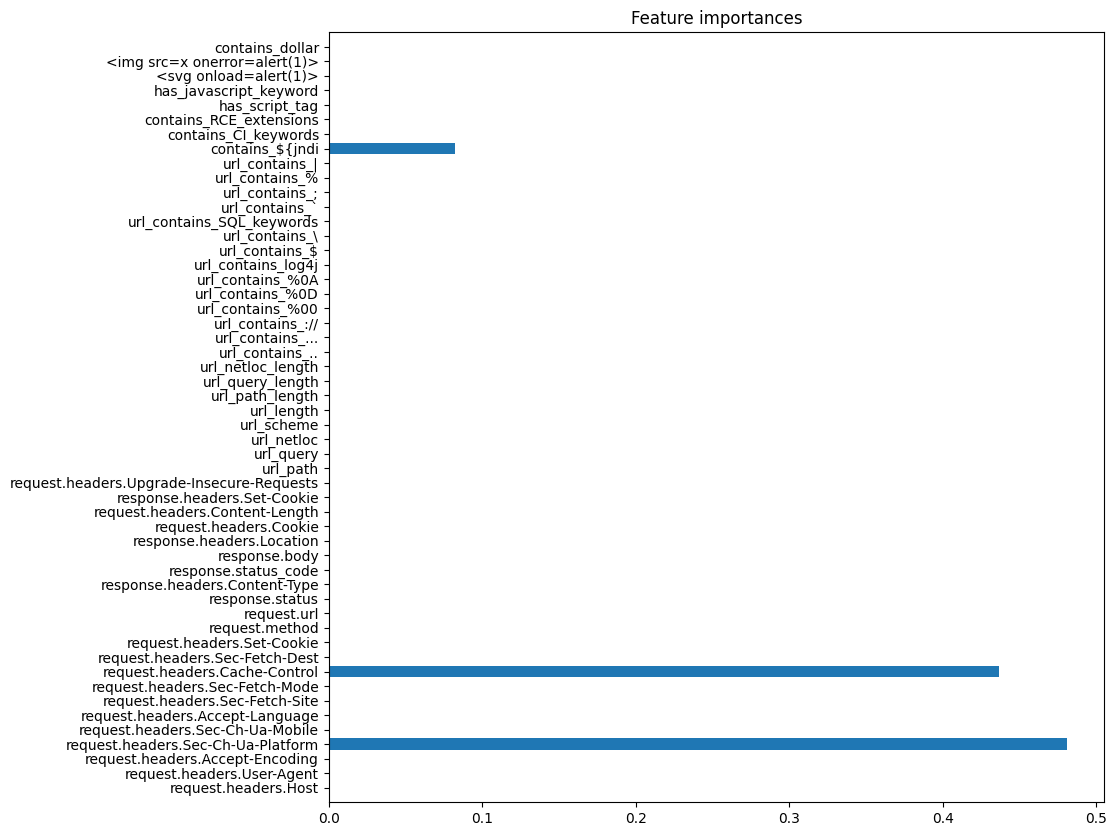

In [56]:
# Feature selection with Decision Tree Classifier

dtc_fs = DecisionTreeClassifier(random_state=42)
dtc_fs.fit(x_train_pca, y_train)

plot_feature_importance(dtc_fs)

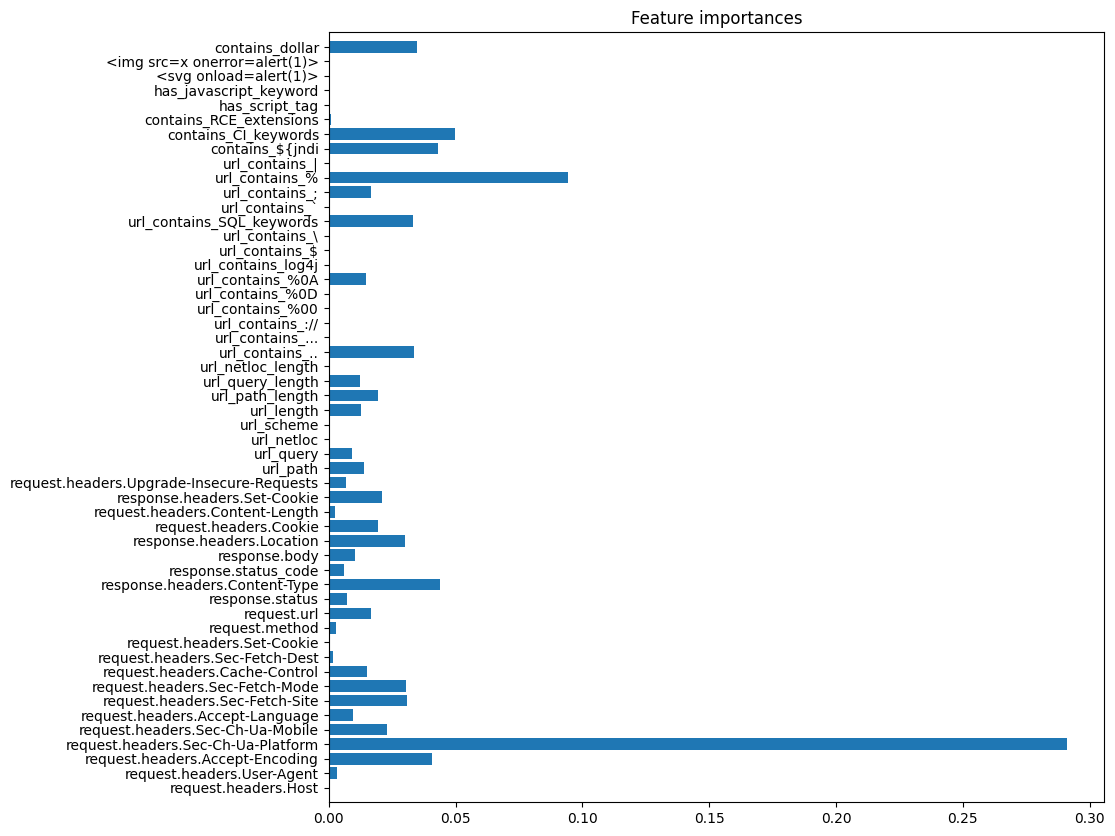

In [57]:
# Feature selection with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

etc_fs = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc_fs.fit(x_train_pca, y_train)

plot_feature_importance(etc_fs)

In [58]:
# Print the feature ranking - Top 10
fs_table = pd.DataFrame(columns=['Feature', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Linear SVC', 'Decision Tree', 'Extra Trees'])
fs_table['Feature'] = features_list
fs_table['Random Forest'] = rfc_fs.feature_importances_

fs_table['AdaBoost'] = abc_fs.feature_importances_
fs_table['Gradient Boosting'] = gbc_fs.feature_importances_
fs_table['Linear SVC'] = np.abs(lsvc.coef_[0])
fs_table['Decision Tree'] = dtc_fs.feature_importances_
fs_table['Extra Trees'] = etc_fs.feature_importances_

fs_table['Mean'] = fs_table.mean(axis=1)
fs_table.sort_values(by='Mean', ascending=False, inplace=True)
fs_table.head(15)

C:\Users\kushn\AppData\Local\Temp\ipykernel_15828\907717656.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Feature,Random Forest,AdaBoost,Gradient Boosting,Linear SVC,Decision Tree,Extra Trees,Mean
3,request.headers.Sec-Ch-Ua-Platform,0.202613,0.49,4.808677e-01,0.931040,0.480868,0.291023,0.479402
44,contains_${jndi,0.045770,0.24,8.229807e-02,0.289188,0.082298,0.043040,0.130432
45,contains_CI_keywords,0.001825,0.01,8.290007e-04,0.641608,0.000000,0.049727,0.117331
8,request.headers.Cache-Control,0.004301,0.01,1.085420e-01,0.000000,0.436834,0.014909,0.095764
1,request.headers.User-Agent,0.027940,0.13,8.558258e-02,0.000000,0.000000,0.003327,0.041142
42,url_contains_%,0.096208,0.00,0.000000e+00,0.000030,0.000000,0.094176,0.031736
9,request.headers.Sec-Fetch-Dest,0.013428,0.01,1.598083e-01,0.000000,0.000000,0.001610,0.030808
10,request.headers.Set-Cookie,0.024221,0.04,4.760800e-02,0.000000,0.000000,0.000644,0.018745
12,request.url,0.080339,0.00,1.632102e-13,0.000000,0.000000,0.016811,0.016192
2,request.headers.Accept-Encoding,0.048298,0.00,1.053091e-04,0.000000,0.000000,0.040634,0.014840


In [59]:
# x_train_pca = x_train_pca[:, fs_table['Mean'].head(15).index]
# x_test_pca = x_test_pca[:, fs_table['Mean'].head(15).index]

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 fe

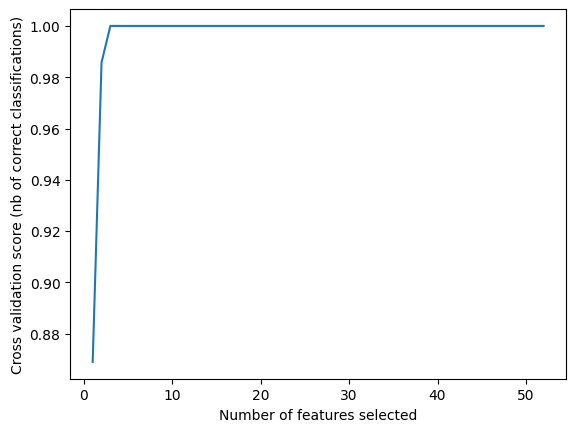

In [61]:
# Feature selection

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
recall_scorer = make_scorer(recall_score, pos_label='Malware')
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=1, n_jobs=-1)
rfecv.fit(x_train_pca, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

x_train_pca = rfecv.transform(x_train_pca)
x_test_pca = rfecv.transform(x_test_pca)

In [62]:
def create_grid_search(model, params):
    # Create a grid search object which is used to find the best hyperparameters for the model
    return GridSearchCV(estimator=model,
                        param_grid=params,
                        n_jobs=-1,
                        verbose=3,
                        cv=3,
                        scoring='accuracy',
                        return_train_score=True)

In [63]:
# https://plotly.com/python/parallel-categories-diagram/

def plot_grid_search_results(results):

    df = pd.DataFrame(results)

    # Build parcats dimensions
    categorical_dimensions = [c for c in df.columns if "param_" in c]

    dimensions = [dict(values=df[label], label=label)for label in categorical_dimensions]

    # Build color scale
    color = np.zeros(len(df), dtype='uint8')
    colorscale = [[0, 'gray'], [1, 'blue']]

    # Build figure as FigureWidget
    fig = go.FigureWidget(data=[go.Scatter(x=df['std_test_score'], y=df['mean_test_score'], marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'blue'}}, unselected={'marker': {'opacity': 0.3}}), go.Parcats(domain={'y': [0, 0.4]}, dimensions=dimensions,line={'colorscale': colorscale, 'cmin': 0,'cmax': 1, 'color': color, 'shape': 'hspline'})])

    fig.update_layout(
        height=800, xaxis={'title': 'STD Score'},
        yaxis={'title': 'Mean Score', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

    # Update color callback
    def update_color(points):
        # Update scatter selection
        fig.data[0].selectedpoints = points.point_inds

        # Update parcats colors
        new_color = np.zeros(len(df), dtype='uint8')
        new_color[points.point_inds] = 1
        fig.data[1].line.color = new_color

    # Register callback on scatter selection...
    fig.data[0].on_selection(update_color)

    # and parcats click
    fig.data[1].on_click(update_color)

    return fig

### Model Choosing & Fitting


#### Random Forest

Ensemble learning method that uses multiple decision trees to make predictions.
It is a robust and flexible model that can handle high-dimensional and complex data,making it a good choice for API classification tasks.

In [ ]:
rf = RandomForestClassifier()
rf_param = {
    "n_estimators": [150, 250, 750],
    "criterion": ["gini", "entropy"],
    "max_depth": [20],
    "min_samples_split": [2],
    "random_state": [43],
}
rf_gcv = create_grid_search(rf, rf_param)

In [65]:
rf_gcv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [20],
                         'min_samples_split': [2],
                         'n_estimators': [150, 250, 750],
                         'random_state': [43]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [66]:
# plot_grid_search_results(rf_gcv.cv_results_)

In [67]:
print("Best parameters: ", rf_gcv.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 43}


In [68]:
clf = rf_gcv.best_estimator_

In [69]:
# Save the model
filename = "Model/"+str(dataset_number)+"/rf"+str(dataset_number)+"_model_label.sav"
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     25292
           1    1.00000   1.00000   1.00000      6967

    accuracy                        1.00000     32259
   macro avg    1.00000   1.00000   1.00000     32259
weighted avg    1.00000   1.00000   1.00000     32259



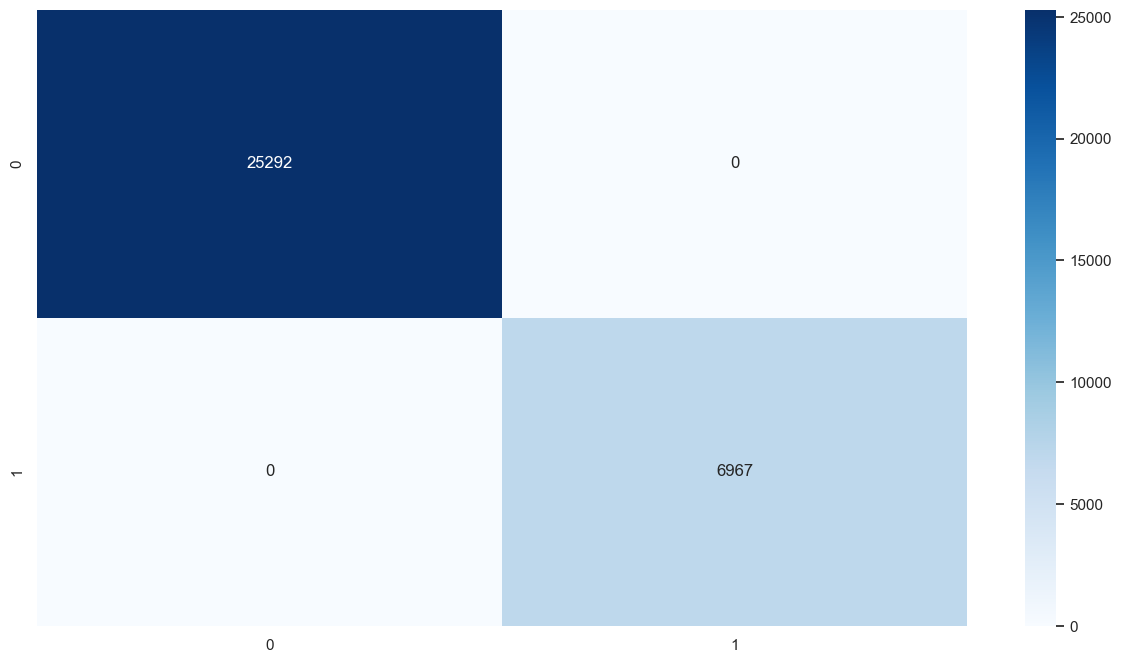

In [70]:
show(clf)

#### Result


In [71]:
def show(model):
    # We print our results
    sns.set(rc={'figure.figsize': (15, 8)})
    predictions = model.predict(x_test_pca)
    true_labels = y_test
    cf_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))

    # The heatmap is cool but this is the most important result
    print(model_report)

## Test


In [72]:
# Read the valuation json, preprocess it and run your model
with open(f'./dataset_{str(dataset_number)}_val.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset -- Remember that here you don't have the labels
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in test_df.columns[test_df.isna().any()].tolist():
    test_df[column] = test_df[column].fillna('None')

create_features(test_df)
test_df = vectorize_df(test_df)

X = test_df[features_list].to_numpy()
X = ss.transform(X)
X = rfecv.transform(X)
predictions = clf.predict(X)

C:\Users\kushn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



### Save predictions

In [79]:
enc = LabelEncoder()
np.savetxt(f'./dataset_{str(dataset_number)}_{test_type}_result.txt',
           enc.fit_transform(predictions), fmt='%2d')